In [1]:
import pickle
from tqdm import tqdm
from sklearn.cluster import DBSCAN
import os
import numpy as np
from map.seem.base_model import build_vl_model
from map.utils.matterport3d_categories import mp3dcat
from map.utils.replica_categories import replica_cat
from map.utils.mapping_utils import load_map
from PIL import Image
import matplotlib.pyplot as plt
from map.utils.mapping_utils import load_map, get_new_pallete, get_new_mask_pallete

model = build_vl_model("seem", input_size=360)

[*] model loaded


In [2]:
root_dir = "/nvme0n1/hong/VLMAPS/InstanceSeemMap/Data/habitat_sim"
dataset_type = "mp3d"
scene = "2t7WUuJeko7_2"
version = "seem_new"
target = "floodfill"

path = os.path.join(root_dir, dataset_type, scene, "map", f"{scene}_{version}")
obstacle_path = os.path.join(path, f"obstacles_{version}.npy")
grid_path = os.path.join(path, f"grid_{version}.npy")
target_grid_path = os.path.join(path, f"{target}_{version}.npy")
target_dict_path = os.path.join(path, f"{target}_instance_dict_{version}.pkl")
target_grid = load_map(target_grid_path)
target_dict = pickle.load(open(target_dict_path, "rb"))


if dataset_type == "mp3d":
    categories = mp3dcat
elif dataset_type == "replica":
    categories = replica_cat


[0 1]


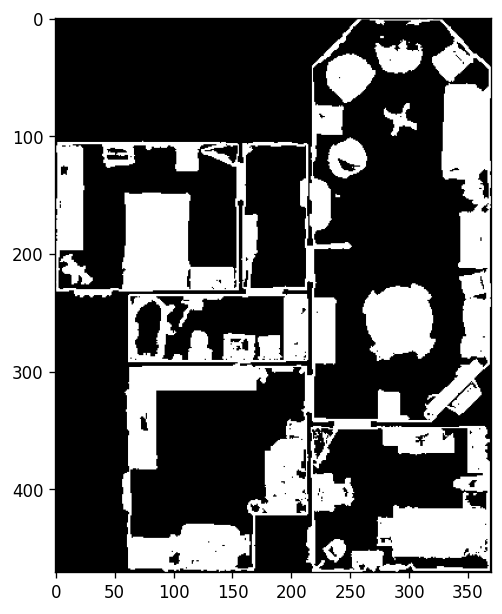

In [3]:
obstacles = load_map(obstacle_path)
x_indices, y_indices = np.where(obstacles == 1)

xmin = np.min(x_indices)
xmax = np.max(x_indices)
ymin = np.min(y_indices)
ymax = np.max(y_indices)

print(np.unique(obstacles))
obstacles_pil = Image.fromarray(obstacles[xmin:xmax+1, ymin:ymax+1])
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(obstacles_pil, cmap='gray')
plt.show()

dict_values([{'embedding': array([-0.86484706, -0.9475697 ,  0.8024479 , -0.2283734 , -1.845323  ,
       -0.9989318 ,  0.7683705 ,  0.9173139 , -0.22721902, -0.16797698,
       -0.24619652, -0.52454966,  0.06380401,  0.88702536,  0.567126  ,
       -0.24188785, -0.5542929 , -1.7350328 , -0.6222394 , -0.6107443 ,
       -0.9357557 , -1.2483371 , -1.458293  ,  0.4496243 , -1.0817885 ,
        0.8485631 , -1.8755335 ,  0.05843391,  0.41460875,  0.66829276,
        0.39910772,  1.1090424 , -1.8549651 ,  0.9537152 , -0.95343846,
        0.9303064 , -0.4709844 , -1.0318295 ,  0.6995629 , -0.67490846,
        2.5696423 ,  0.5554218 , -0.36891145, -0.6050495 , -0.05680038,
       -1.332797  , -0.6725066 ,  0.12899193,  0.3393705 ,  0.89949596,
       -0.11809984,  0.10194493, -0.5050277 , -0.40804926, -0.51387185,
        0.93642074,  0.8635824 ,  0.3033757 , -1.3901225 ,  0.5003489 ,
       -2.2673297 ,  0.7162777 , -0.75784796,  0.21753839, -1.7903214 ,
        0.77325135, -0.71640635,  0.7

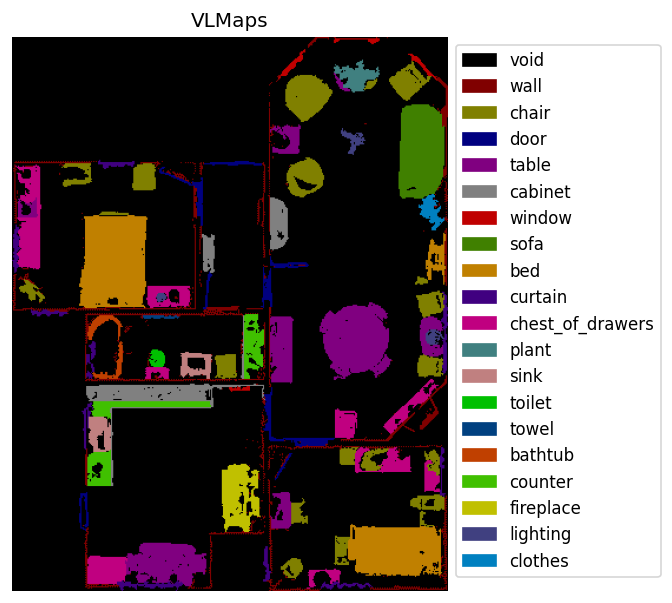

In [4]:
# print(np.unique(target_grid))
predicts = target_grid#[xmin:xmax+1, ymin:ymax+1]
# print(np.unique(predicts))
# print(target_grid.shape, obstacles.shape)
new_predicts = np.zeros_like(predicts)
print(target_dict.values())
for i in range(predicts.shape[0]):
    for j in range(predicts.shape[1]):
        if predicts[i, j] != 0:
            new_predicts[i, j] = target_dict[predicts[i, j]]["category_id"]
        else:
            new_predicts[i, j] = 0

# print(np.unique(predicts))
# print(np.unique(new_predicts))

print(len(categories), len(np.unique(new_predicts)))

new_pallete = get_new_pallete(len(categories))
mask, patches = get_new_mask_pallete(new_predicts, new_pallete, out_label_flag=True, labels=categories)
seg = mask.convert("RGBA")
seg = np.array(seg)
seg = Image.fromarray(seg)
plt.figure(figsize=(10, 6), dpi=120)
plt.legend(handles=patches, loc='upper left', bbox_to_anchor=(1., 1), prop={'size': 10})
plt.axis('off')
plt.title("VLMaps")
plt.imshow(seg)
plt.show()

99
dict_keys([1, 2, 4, 32, 40, 46, 50, 99, 119, 141, 160, 230, 257, 277, 366, 372, 444, 476, 479, 490, 524, 689, 694, 739, 755, 759, 837, 870, 935, 990, 1005, 1008, 1120, 1172, 1210, 1237, 1255, 1307, 1334, 1343, 1347, 1425, 1462, 1512, 1541, 1655, 1661, 1663, 1667, 1671, 1675, 1766, 1777, 1852, 1853, 1902, 1918, 1932, 1938, 1943, 2055, 2196, 2271, 2325, 2347, 2370, 2479, 2486, 2490, 2526, 2551, 2570, 2605, 2691, 2838, 2844, 2851, 2852, 2863, 2872, 2881, 2905, 2982, 3002, 3176, 3179, 3190, 3216, 3303, 3403, 3504, 3526, 3543, 3580, 3594, 3667, 3705, 3798, 3827])
wall
(471, 370)
3155


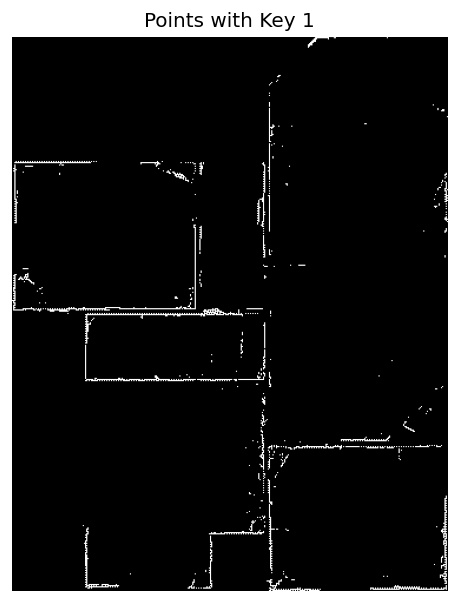

wall
(471, 370)
59


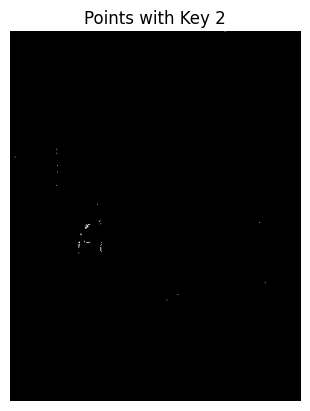

window
(471, 370)
76


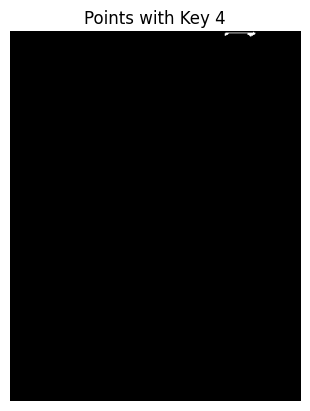

window
(471, 370)
120


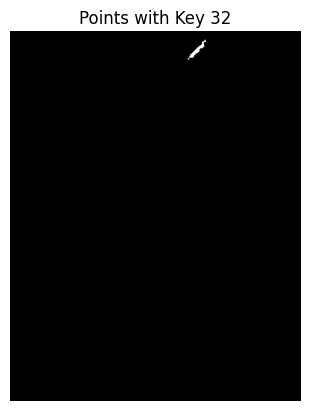

window
(471, 370)
92


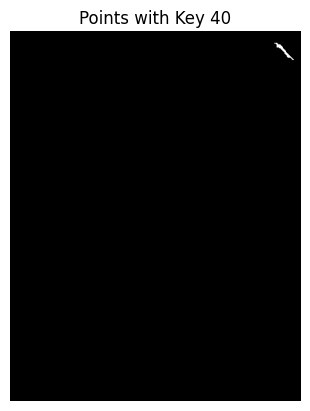

plant
(471, 370)
516


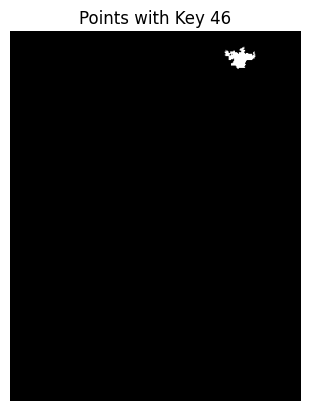

chair
(471, 370)
579


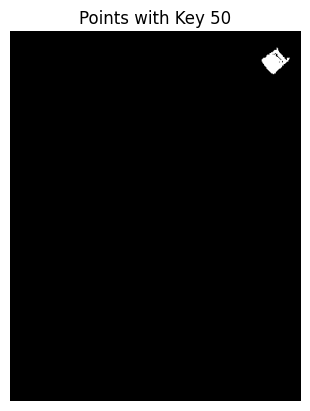

table
(471, 370)
60


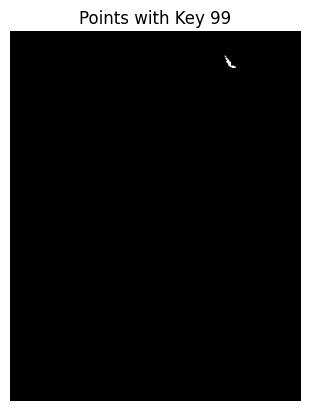

chair
(471, 370)
1107


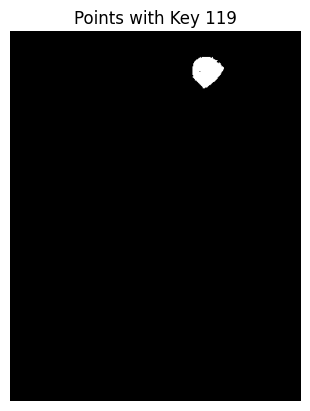

wall
(471, 370)
195


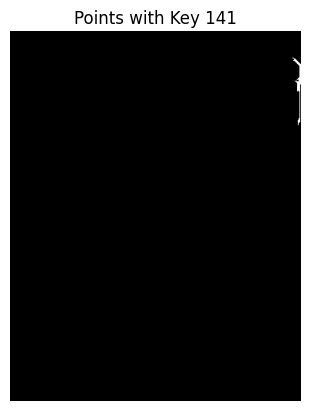

chair
(471, 370)
55


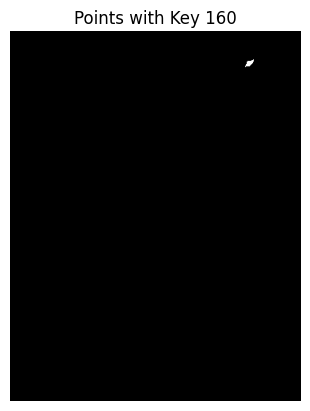

sofa
(471, 370)
2761


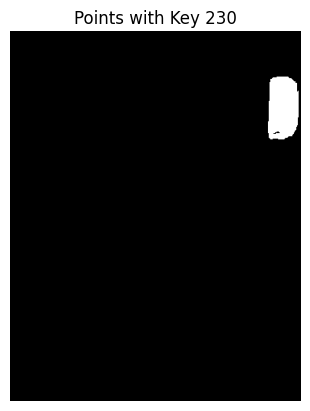

table
(471, 370)
361


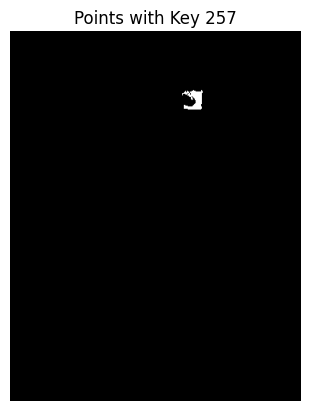

lighting
(471, 370)
178


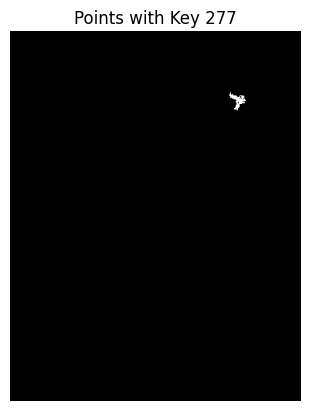

chair
(471, 370)
688


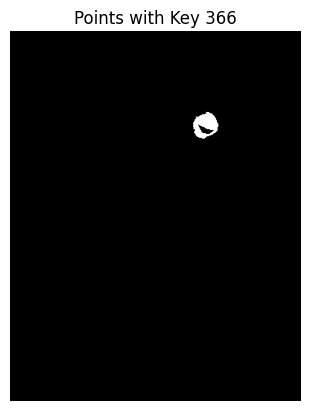

curtain
(471, 370)
115


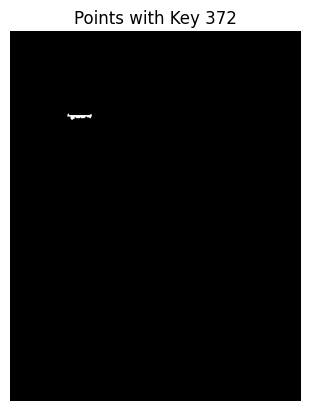

door
(471, 370)
117


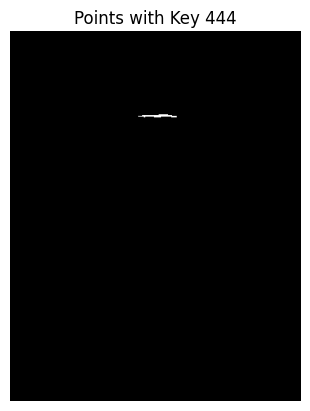

chair
(471, 370)
236


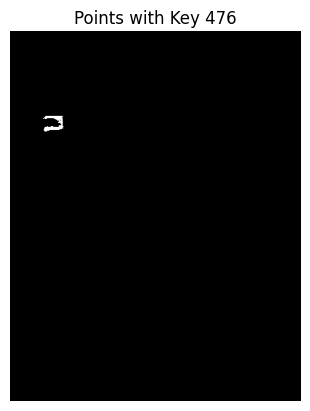

chair
(471, 370)
413


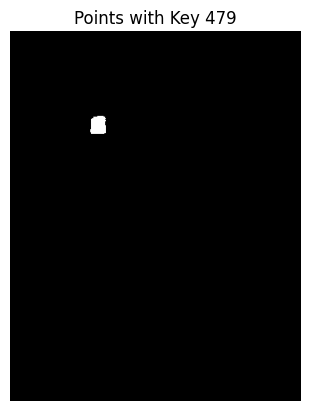

chest_of_drawers
(471, 370)
1075


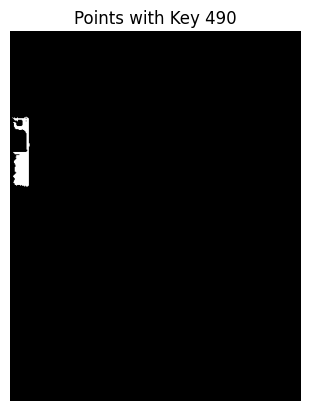

door
(471, 370)
249


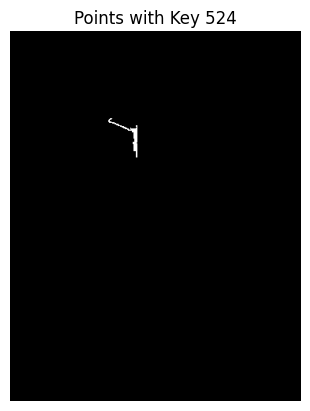

chest_of_drawers
(471, 370)
146


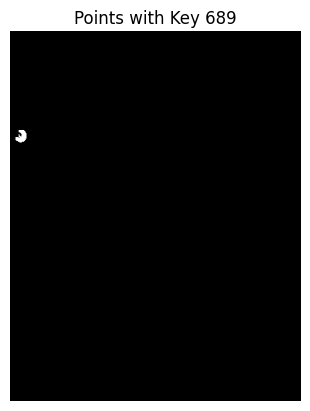

wall
(471, 370)
65


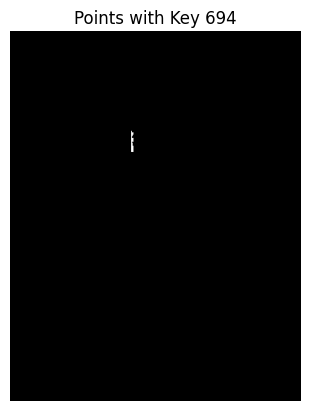

clothes
(471, 370)
323


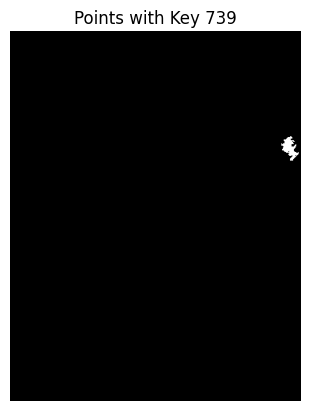

table
(471, 370)
152


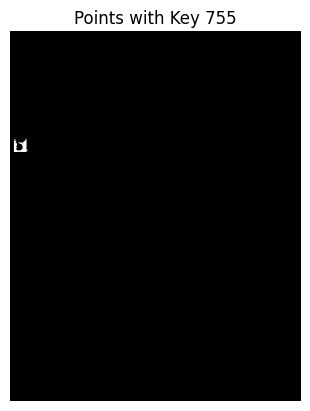

cabinet
(471, 370)
565


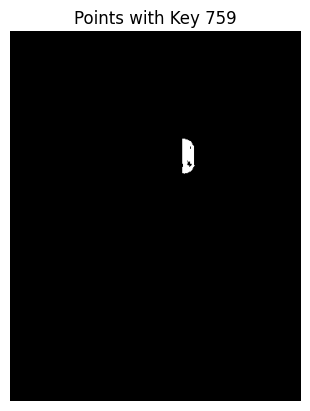

chair
(471, 370)
62


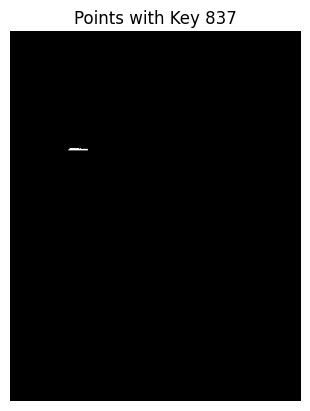

bed
(471, 370)
4029


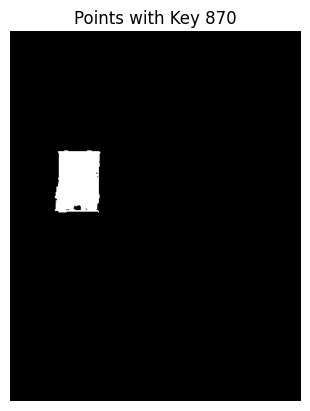

curtain
(471, 370)
149


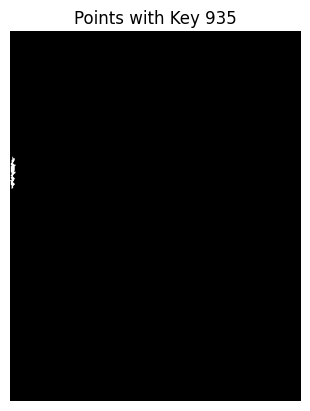

wall
(471, 370)
72


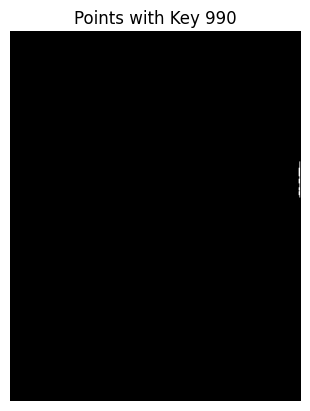

bed
(471, 370)
350


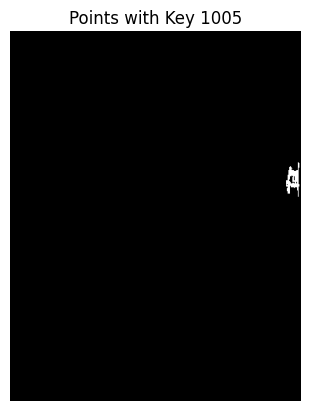

cabinet
(471, 370)
284


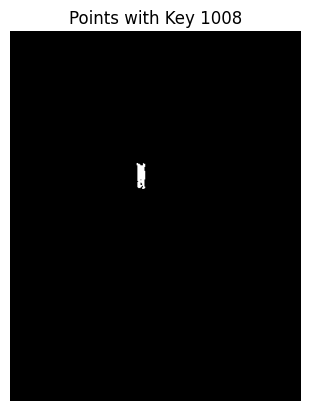

door
(471, 370)
126


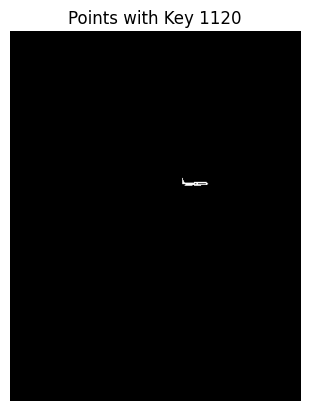

door
(471, 370)
186


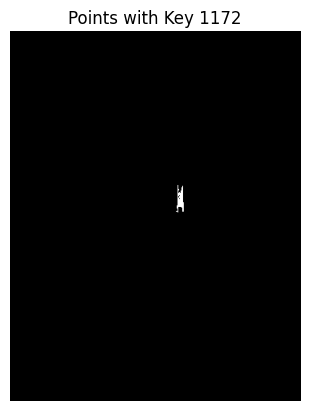

door
(471, 370)
69


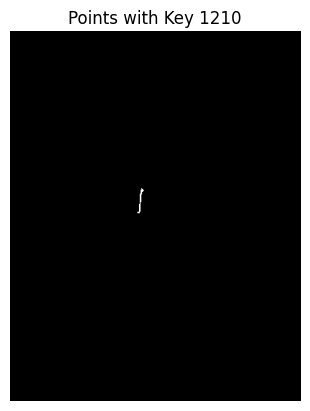

chair
(471, 370)
51


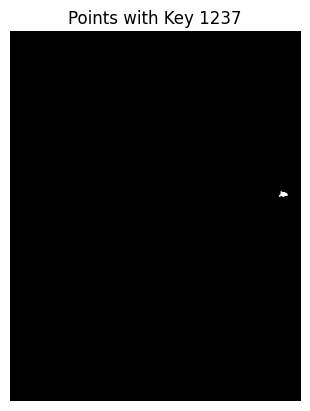

chair
(471, 370)
182


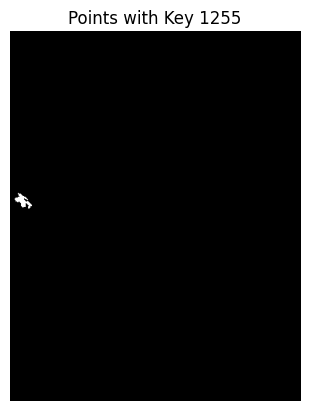

chest_of_drawers
(471, 370)
479


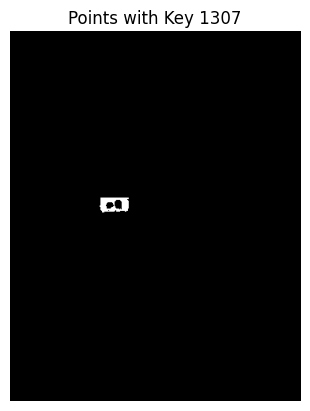

chair
(471, 370)
365


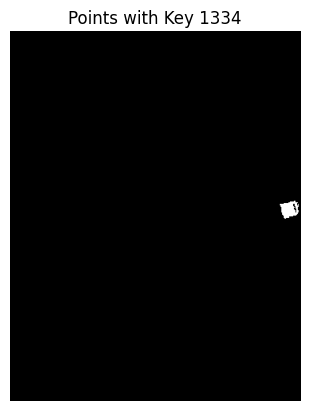

curtain
(471, 370)
95


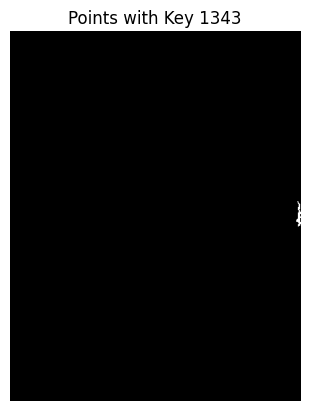

lighting
(471, 370)
51


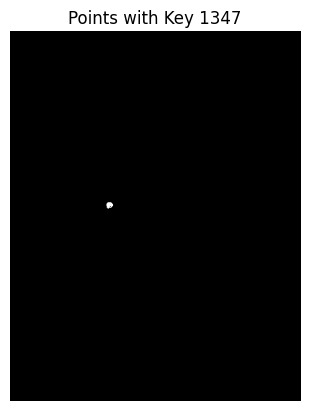

table
(471, 370)
2910


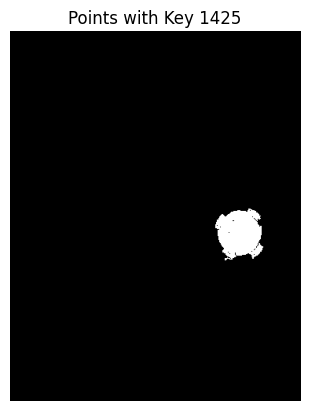

wall
(471, 370)
72


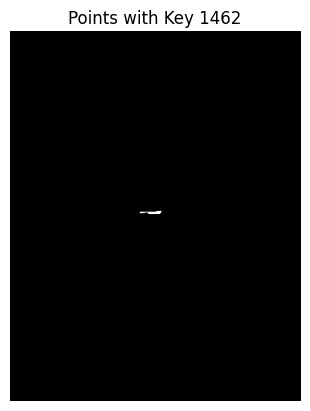

wall
(471, 370)
63


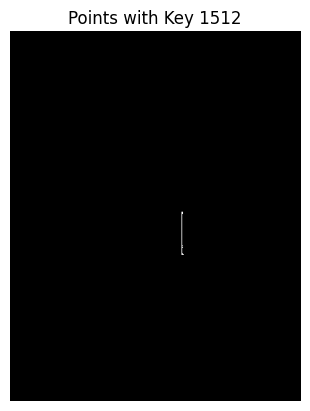

curtain
(471, 370)
104


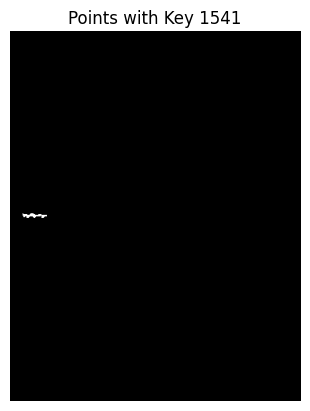

counter
(471, 370)
642


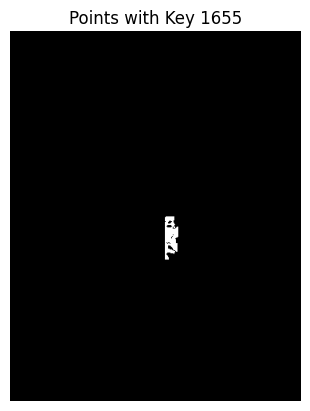

bathtub
(471, 370)
222


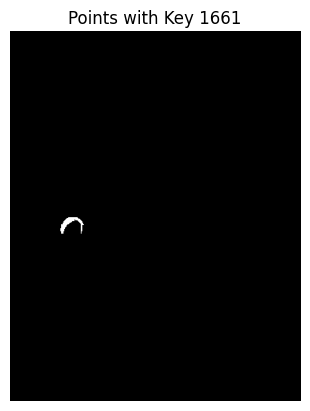

towel
(471, 370)
75


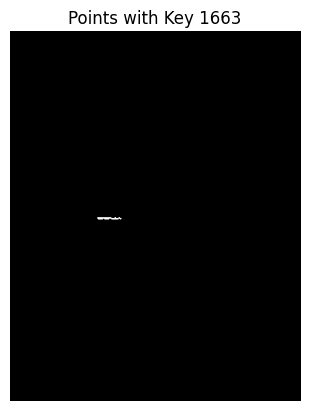

cabinet
(471, 370)
80


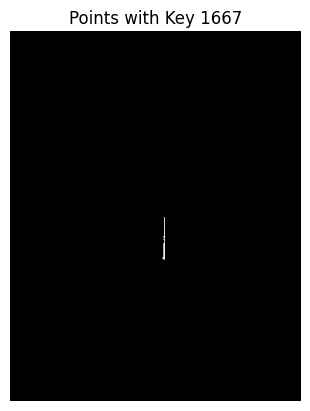

table
(471, 370)
996


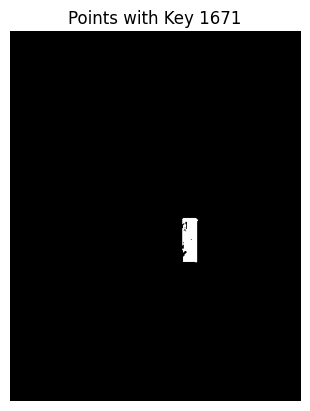

table
(471, 370)
409


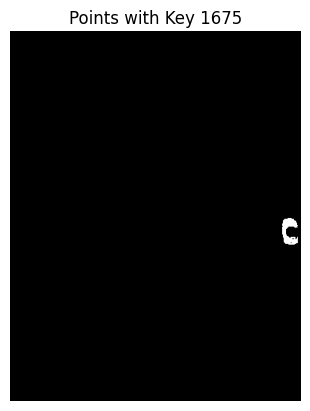

curtain
(471, 370)
102


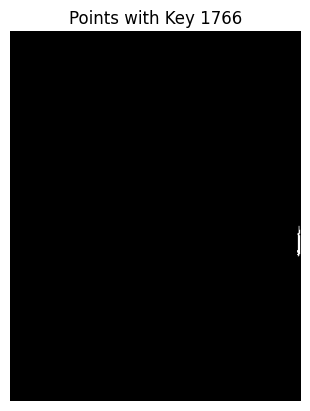

lighting
(471, 370)
126


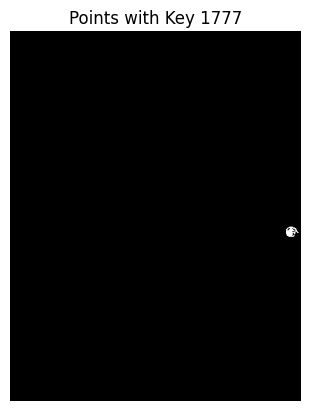

curtain
(471, 370)
57


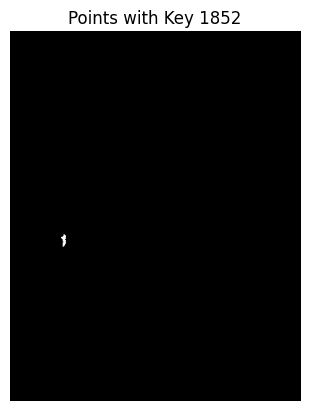

bathtub
(471, 370)
192


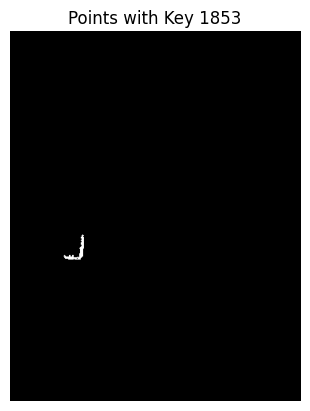

toilet
(471, 370)
163


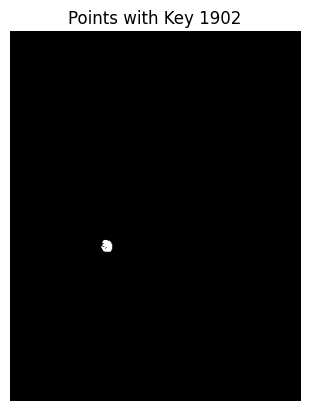

sink
(471, 370)
354


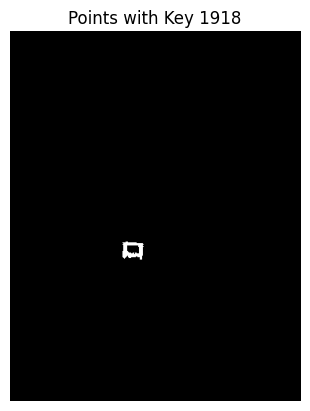

curtain
(471, 370)
65


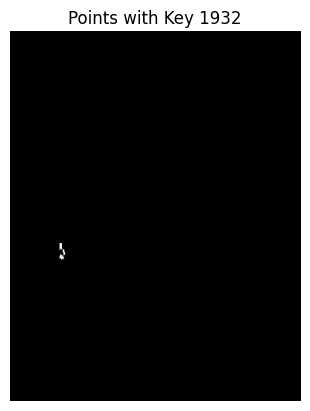

chair
(471, 370)
330


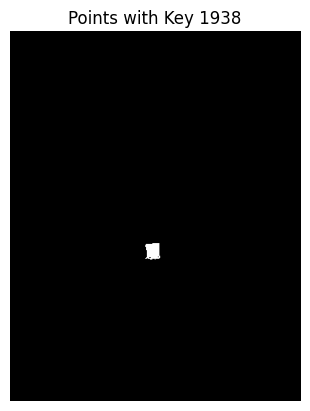

chair
(471, 370)
331


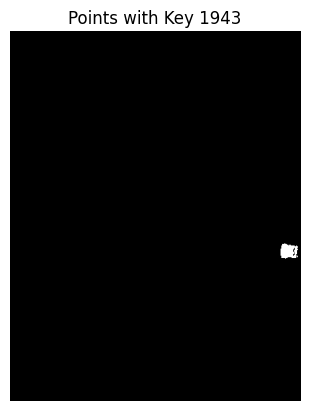

chest_of_drawers
(471, 370)
150


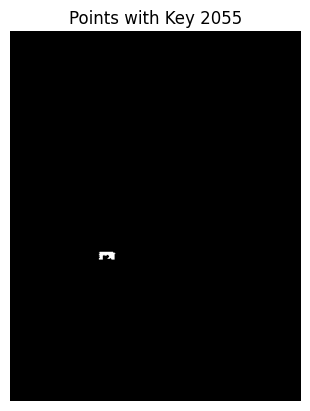

wall
(471, 370)
173


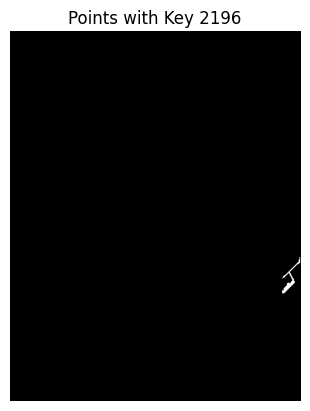

chest_of_drawers
(471, 370)
431


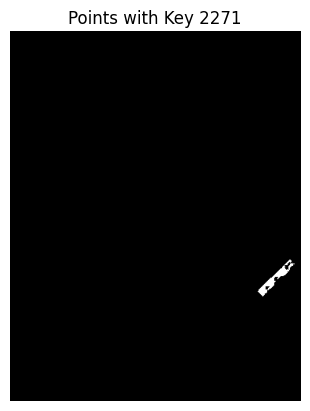

cabinet
(471, 370)
1508


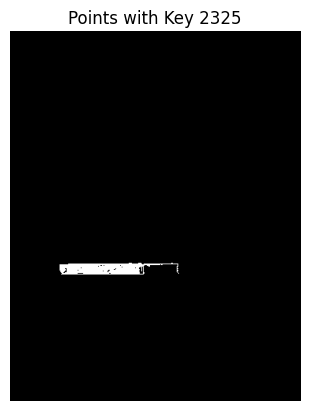

window
(471, 370)
51


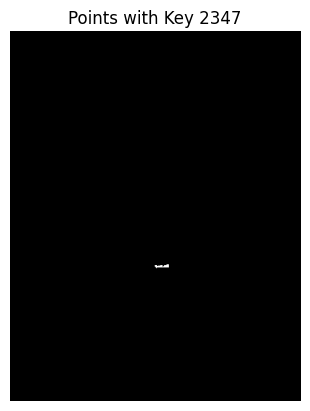

door
(471, 370)
200


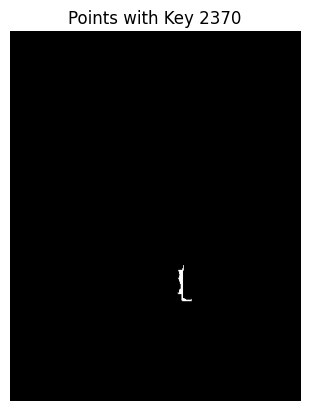

cabinet
(471, 370)
190


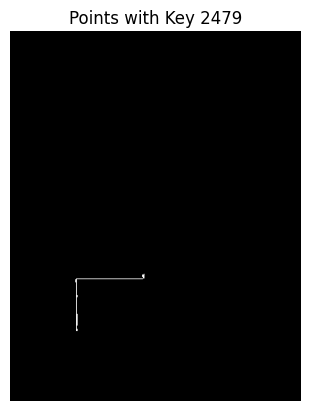

counter
(471, 370)
623


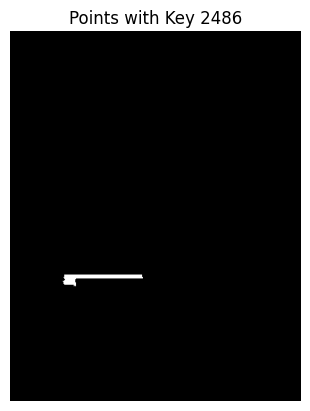

curtain
(471, 370)
118


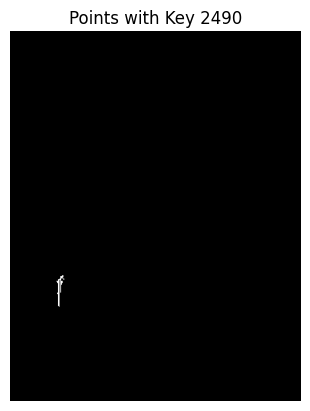

chest_of_drawers
(471, 370)
404


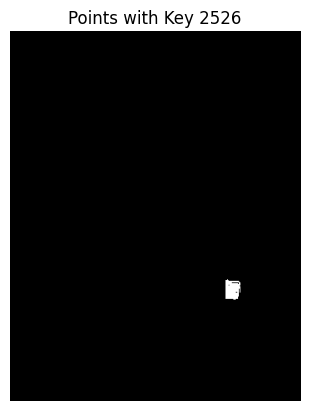

wall
(471, 370)
59


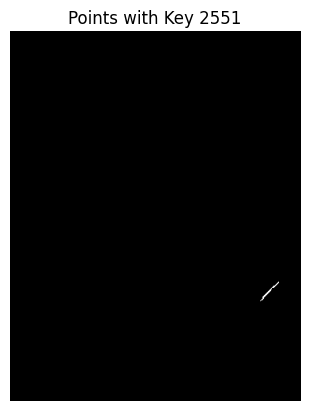

sink
(471, 370)
389


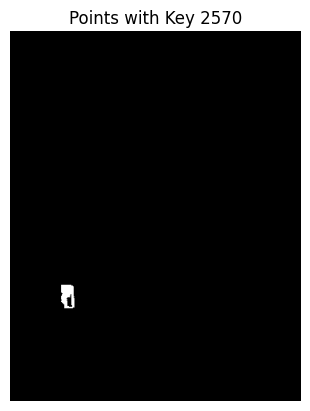

sink
(471, 370)
51


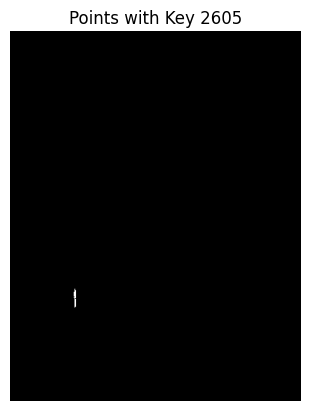

door
(471, 370)
220


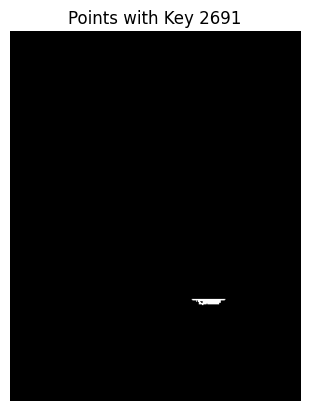

chair
(471, 370)
189


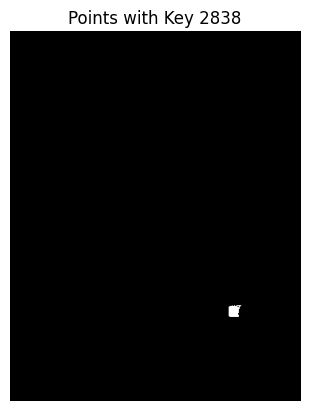

chest_of_drawers
(471, 370)
499


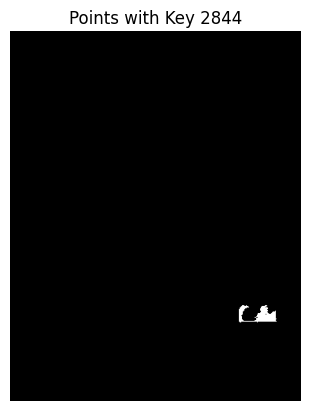

curtain
(471, 370)
86


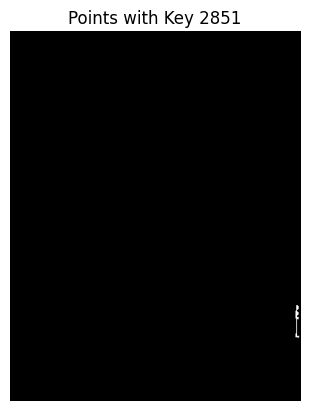

wall
(471, 370)
58


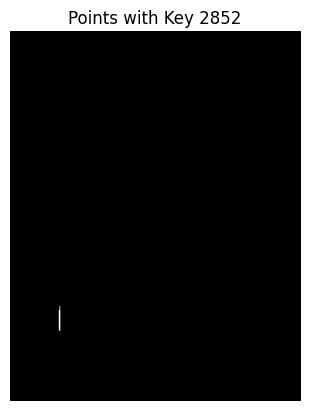

chair
(471, 370)
214


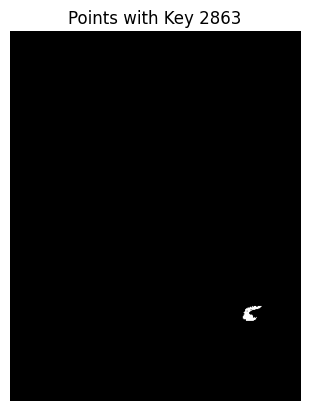

counter
(471, 370)
489


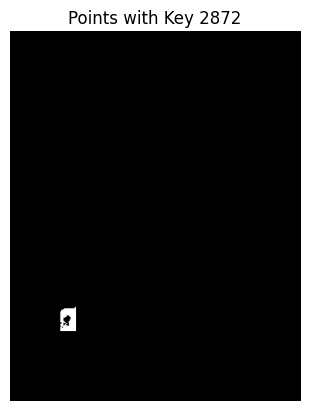

chair
(471, 370)
166


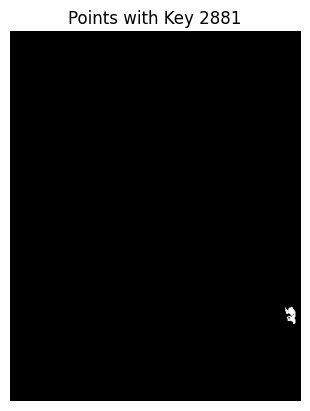

door
(471, 370)
50


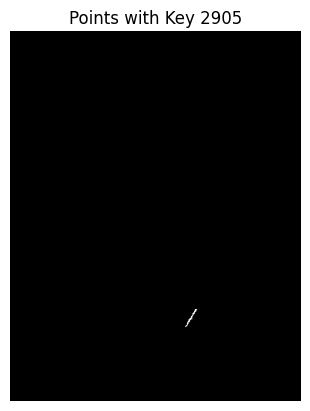

chest_of_drawers
(471, 370)
231


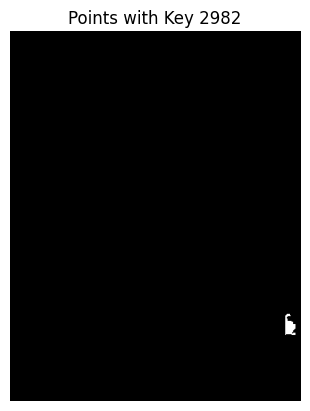

fireplace
(471, 370)
1352


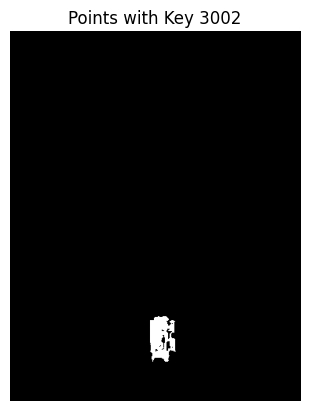

door
(471, 370)
122


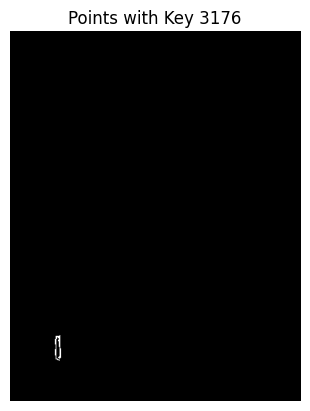

table
(471, 370)
373


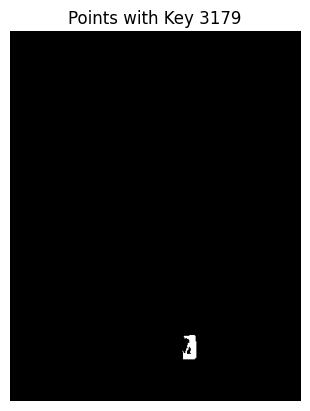

chair
(471, 370)
276


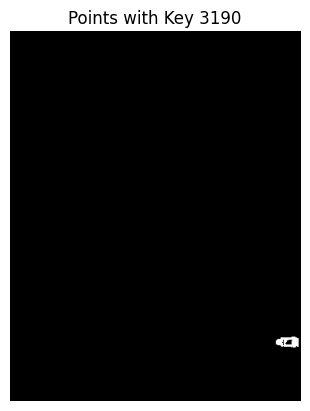

chair
(471, 370)
187


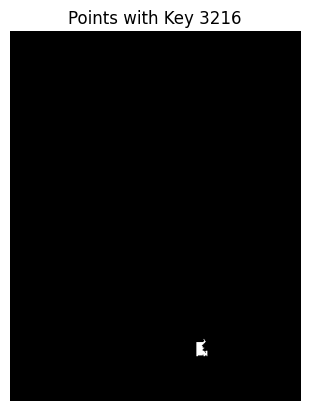

chair
(471, 370)
54


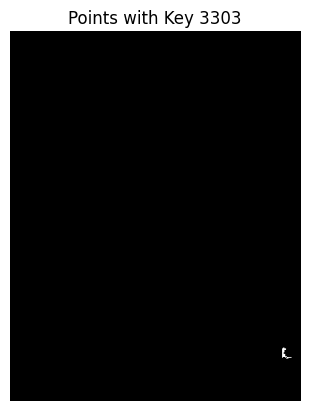

bed
(471, 370)
3005


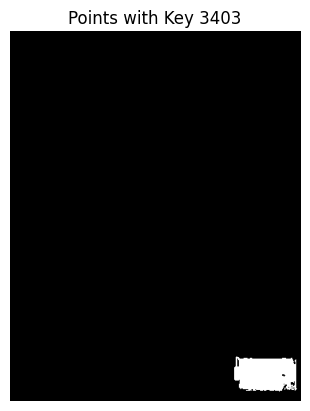

chair
(471, 370)
233


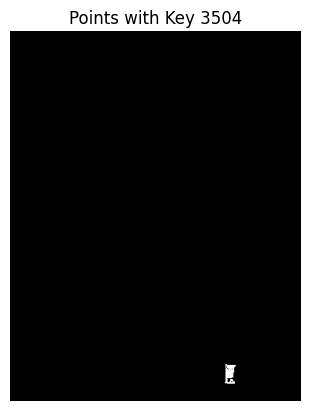

table
(471, 370)
1736


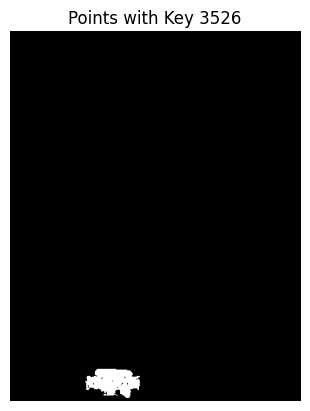

curtain
(471, 370)
100


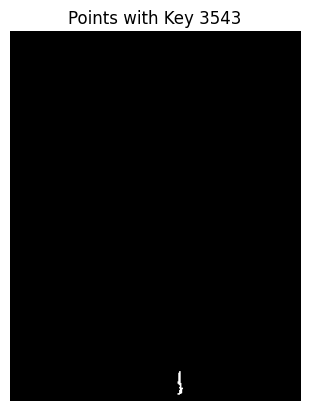

chest_of_drawers
(471, 370)
742


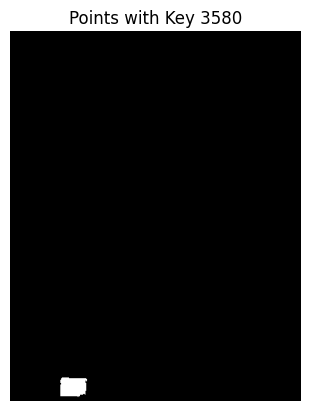

chair
(471, 370)
201


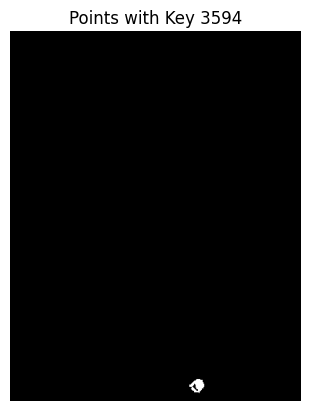

chest_of_drawers
(471, 370)
188


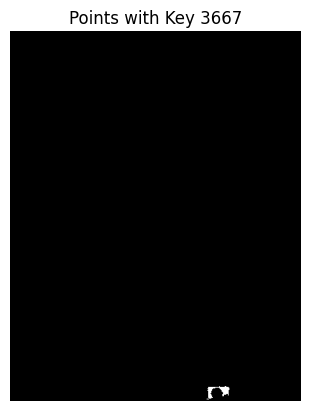

table
(471, 370)
66


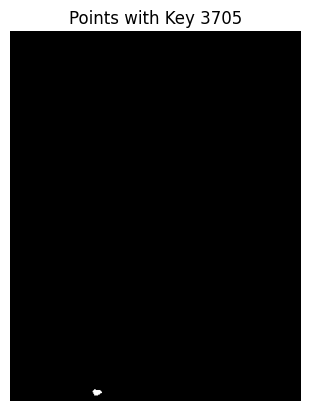

curtain
(471, 370)
216


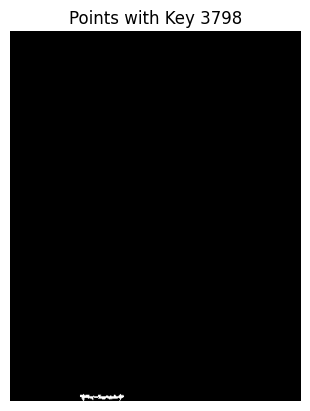

curtain
(471, 370)
131


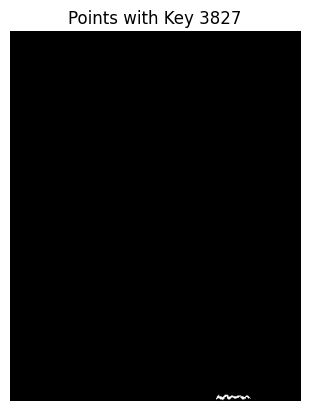

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 시각화를 위한 설정
plt.figure(figsize=(10, 6), dpi=120)
print(len(target_dict.keys()))
print(target_dict.keys())
# k값을 0부터 287까지 변경하면서 시각화
for n,id in enumerate(target_dict.keys()):
    # 좌표에 k가 키값으로 있는 포인트만 선택하여 ggrid_map 생성
    ggrid_map = target_grid == id
    # maskk = target_dict[id]["mask"]
    # print(maskk.shape)
    # print(np.sum(maskk))
    # # 시각화를 위해 1이 있는 곳만 표시
    # plt.clf()  # 이전 이미지 지우기
    # plt.imshow(maskk, cmap="gray")
    class_id = target_dict[id]["category_id"]
    class_name = target_dict[id]["category"]

    plt.clf()
    print(class_name)
    print(ggrid_map.shape)

    print(np.sum(ggrid_map))
    plt.imshow(ggrid_map, cmap="gray")


    plt.axis('off')
    plt.title(f"Points with Key {id}")
    plt.draw()  # 현재 상태를 그리기
    plt.pause(0.5)  # 0.5초 간격으로 업데이트 (시간 조정 가능)

    plt.show()